In [1]:
import healpy as hp
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

In [2]:
#healpix size. NSIDE must be a power of two. Larger=finer.

NSIDE=2**8
NPIX = hp.nside2npix(NSIDE)


Given a healpix map and a sky direction (given here as the healpix pixel index), add the back-projected compton cone around that pixel to the map. That is done by finding the pixels in a ring (with given radius and width) around the given direction, and adding 1 to the map value of the pixels in that ring. (Might want to normalize it by the ring area eventually.)

In [4]:
def AddRingToMap(m, pix, radius=30, width=5): 
    
    rO=np.deg2rad(radius+0.5*width)
    rI=np.deg2rad(radius-0.5*width)
    vec=hp.pixelfunc.pix2vec(NSIDE, pix)
    sel = hp.query_disc(NSIDE, vec, rO)
    m[sel] += 1
    sel = hp.query_disc(NSIDE, vec, rI)
    m[sel] -= 1

    

Flat background, randomly distributed on the sky. Since the healpix pixels all have equal area, we can just pick random pixels and then add a ring around each pixel.

/Users/hfleisc1/opt/anaconda3/envs/fermipy3ML/lib/python3.7/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/Users/hfleisc1/opt/anaconda3/envs/fermipy3ML/lib/python3.7/site-packages/healpy/projaxes.py:921: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_under(bgcolor)
/Users/hfleisc1/opt/anaconda3/envs/fermipy3ML/lib/python3.7/site-packages/healpy/projaxes.py:922: MatplotlibDeprecationWarning: You are modifying the state of a globally re

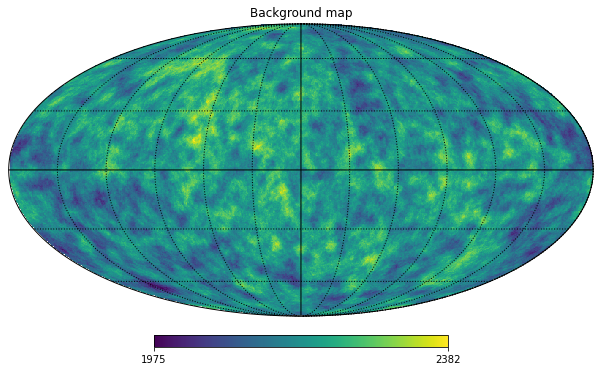

In [5]:
nBG=100000
mBG = np.zeros(NPIX)

for i in np.arange(0, nBG):
    ipix = random.randrange(0, NPIX)
    AddRingToMap(mBG, ipix)

hp.mollview(mBG, title="Background map")
hp.graticule()

Fake point source (Crab location). First, find the ring around the source location with the given radius/width. Any point on that ring should have its backprojected compton cone intersect with the original source location, so we can pick any point on the ring randomly.

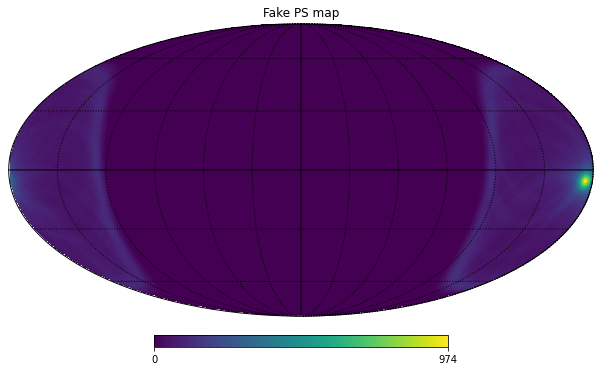

In [6]:
nPS=1000
mPS = np.zeros(NPIX)

l = 184.55746
b = -05.78436

radius=30
width=5
rO=np.deg2rad(radius+0.5*width)
rI=np.deg2rad(radius-0.5*width)

center = hp.pixelfunc.ang2vec(l, b, lonlat=True)
ring=list( set(hp.query_disc(NSIDE, center, rO)) - set(hp.query_disc(NSIDE, center, rI)) )

for i in np.arange(0, nPS):
    ipix = random.choice(ring)
    AddRingToMap(mPS, ipix)

hp.mollview(mPS, fig=1, title="Fake PS map")
hp.graticule()

Galactic plane signal is assumed to be flat in l and gaussian in b, with a width of 2˚. So we can pick a random point with that distribution, than find the "ring" around it and add the backprojected Compton cone of a random point on that ring. 

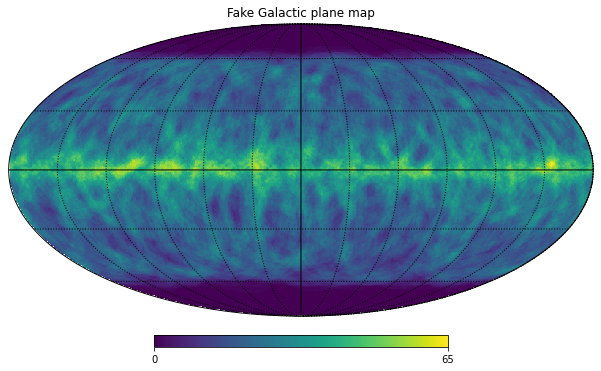

In [8]:
nGal=1000
#run with nGal=10000 instead of 1000 to get a pretty result, takes a few minutes though.

mGal = np.zeros(NPIX)

for i in np.arange(0, nGal):
    
    l=random.uniform(-180, 180)
    b=random.gauss(0, 2)
    
    center = hp.pixelfunc.ang2vec(l, b, lonlat=True)
    ring=list( set(hp.query_disc(NSIDE, center, rO)) - set(hp.query_disc(NSIDE, center, rI)) )

    ipix=random.choice(ring)
    AddRingToMap(mGal, ipix)

hp.mollview(mGal, title="Fake Galactic plane map")
hp.graticule()

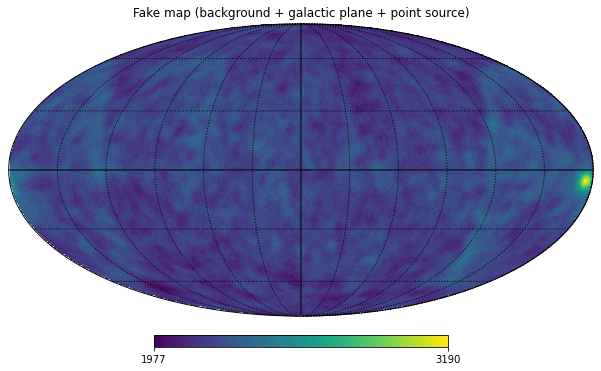

In [9]:
hp.mollview(mPS+mBG+mGal, title="Fake map (background + galactic plane + point source)")
hp.graticule()